In [133]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB

In [134]:
df = pd.read_csv('../../data/star_classification.csv')
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


<font color="blue">Pré-Processamento<font>
------------------

In [135]:
df_4classification= df.drop(['MJD','run_ID','rerun_ID','obj_ID','spec_obj_ID','field_ID','fiber_ID'], axis = 1)
#df_4classification['class'],aux = pd.factorize(df['class'])
# galaxia = 0 ,QSO= 1 ,estrela = 2
df_4classification

,alpha,delta,u,g,r,i,z,cam_col,class,redshift,plate
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,GALAXY,0.634794,5812
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,GALAXY,0.779136,10445
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,GALAXY,0.644195,4576
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,GALAXY,0.932346,9149
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,GALAXY,0.116123,6121
...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,2,GALAXY,0.000000,9374
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,1,GALAXY,0.404895,7626
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,4,GALAXY,0.143366,2764
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,4,GALAXY,0.455040,6751


Oversampling
----

In [136]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
y= df_4classification['class']
X=df_4classification.drop('class' ,axis = 1)
ros = RandomOverSampler(random_state=0)
X_ros,y_ros = ros.fit_resample(X,y)
print('Resampled dataset shape %s' % Counter(y_ros))

Resampled dataset shape Counter({'GALAXY': 59445, 'QSO': 59445, 'STAR': 59445})


In [137]:
class_frequency = df['class'].map(len)

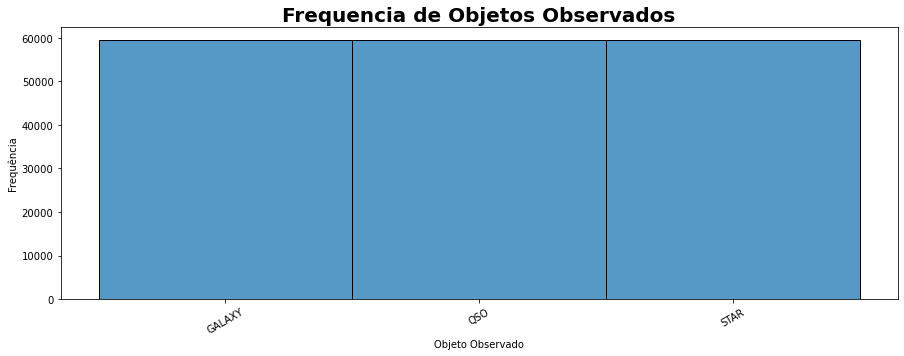

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.title('Frequencia de Objetos Observados', fontsize=20, weight='bold')
sns.histplot(
    data=class_frequency,
    bins=class_frequency.nunique(),
    x= y_ros
)
plt.xticks(rotation=30)
plt.xlabel('Objeto Observado')
plt.ylabel('Frequência')
plt.show()

Testando Normalização com dois métodos diferentes:
---






Método 1:
    

In [120]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler()
X1= MinMaxScaler.fit_transform(X_ros)  

Método 2:

In [139]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()  
scaler.fit(X_ros)
X2=scaler.transform(X_ros)

<font color="blue">Separando dados de treino e de teste<font>
-------

In [140]:
from sklearn.model_selection import train_test_split

Método 1:

In [123]:
#random_state = 2 e 6 dão ótimas acurácias
X1_train, X1_test, y1_train, y1_test = train_test_split ( 
          X1, y_ros, test_size = 0.25, random_state =6)

Método 2:

In [141]:
X2_train, X2_test, y2_train, y2_test = train_test_split ( 
          X2, y_ros, test_size = 0.25, random_state = 5)

<font color="blue">Modelo de Naive Bayes<font>
---------

Método 1:

In [125]:
gnb1 = GaussianNB()
gnb1.fit(X1_train, y1_train)

GaussianNB()

In [126]:
predict1 = gnb1.predict(X1_test)
predict1

array(['STAR', 'QSO', 'GALAXY', ..., 'GALAXY', 'STAR', 'GALAXY'],
      dtype='<U6')

Método 2:

In [142]:
gnb2 = GaussianNB()
gnb2.fit(X2_train, y2_train)

GaussianNB()

In [143]:
predict2 = gnb1.predict(X2_test)
predict2

array(['GALAXY', 'GALAXY', 'GALAXY', ..., 'GALAXY', 'GALAXY', 'STAR'],
      dtype='<U6')

<font color="blue">Métricas de avaliação<font>
-----

Método 1:

In [167]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_score(y1_test, predict1)

print(classification_report(y1_test, predict1))

              precision    recall  f1-score   support

      GALAXY       0.61      0.84      0.71     14936
         QSO       0.71      0.91      0.80     14769
        STAR       0.99      0.33      0.50     14879

    accuracy                           0.69     44584
   macro avg       0.77      0.70      0.67     44584
weighted avg       0.77      0.69      0.67     44584



Método 2:

In [166]:
#Problema com divisão com 0,portanto não descobri como visualizar a acurácia com esse metódo

from sklearn.metrics import accuracy_score, classification_report

accuracy_score(y2_test, predict2)

print(classification_report(y2_test, predict2))

C:\Users\Thiago\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      GALAXY       0.11      0.22      0.15     14894
         QSO       0.00      0.00      0.00     14843
        STAR       0.00      0.00      0.00     14847

    accuracy                           0.07     44584
   macro avg       0.04      0.07      0.05     44584
weighted avg       0.04      0.07      0.05     44584



C:\Users\Thiago\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Thiago\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<font color="blue">Matriz de Confusão<font>
----------

In [18]:
from sklearn.metrics import plot_confusion_matrix
class_names = ['GALAXY', 'QUASAR', 'STAR']

Método 1:

C:\Users\Thiago\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


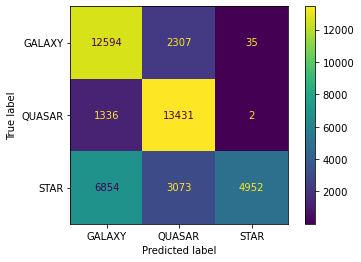

In [131]:
plot_confusion_matrix(gnb1, X1_test, y1_test, 
                      display_labels = class_names)

Método 2:

C:\Users\Thiago\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


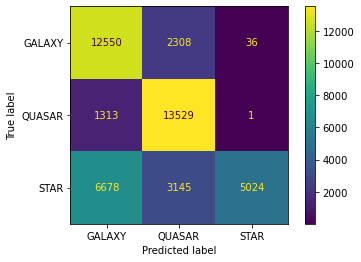

In [132]:
plot_confusion_matrix(gnb2, X2_test, y2_test, 
                      display_labels = class_names)